<a href="https://colab.research.google.com/github/amit112763/ML-projects/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STOCK MARKET PREDICTION - YAHOO FINANCE API

📊 POPULAR STOCK TICKERS:

Indian Stocks (NSE):
  - RELIANCE.NS (Reliance Industries)
  - TCS.NS (Tata Consultancy Services)
  - INFY.NS (Infosys)
  - HDFCBANK.NS (HDFC Bank)
  - SBIN.NS (State Bank of India)

US Stocks:
  - AAPL (Apple)
  - MSFT (Microsoft)
  - GOOGL (Google)
  - TSLA (Tesla)
  - AMZN (Amazon)

📈 Enter Stock Ticker Symbol (default: RELIANCE.NS): AMZN
📅 Enter number of days to forecast (default: 7): 7

🔍 ANALYZING: AMZN

STEP 1: FETCH REAL DATA FROM YAHOO FINANCE
----------------------------------------------------------------------
Fetching data for: RELIANCE.NS
Period: 2020-01-01 to 2024-12-31

✓ Data fetched successfully for RELIANCE.NS!

First 5 rows of data:
Price        Date       Close        High         Low        Open      Volume
Ticker            RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
0      2020-01-01  675.324158  683.152852  673.490062  679.081936    14004468
1      2020-01-02  686.821228  68

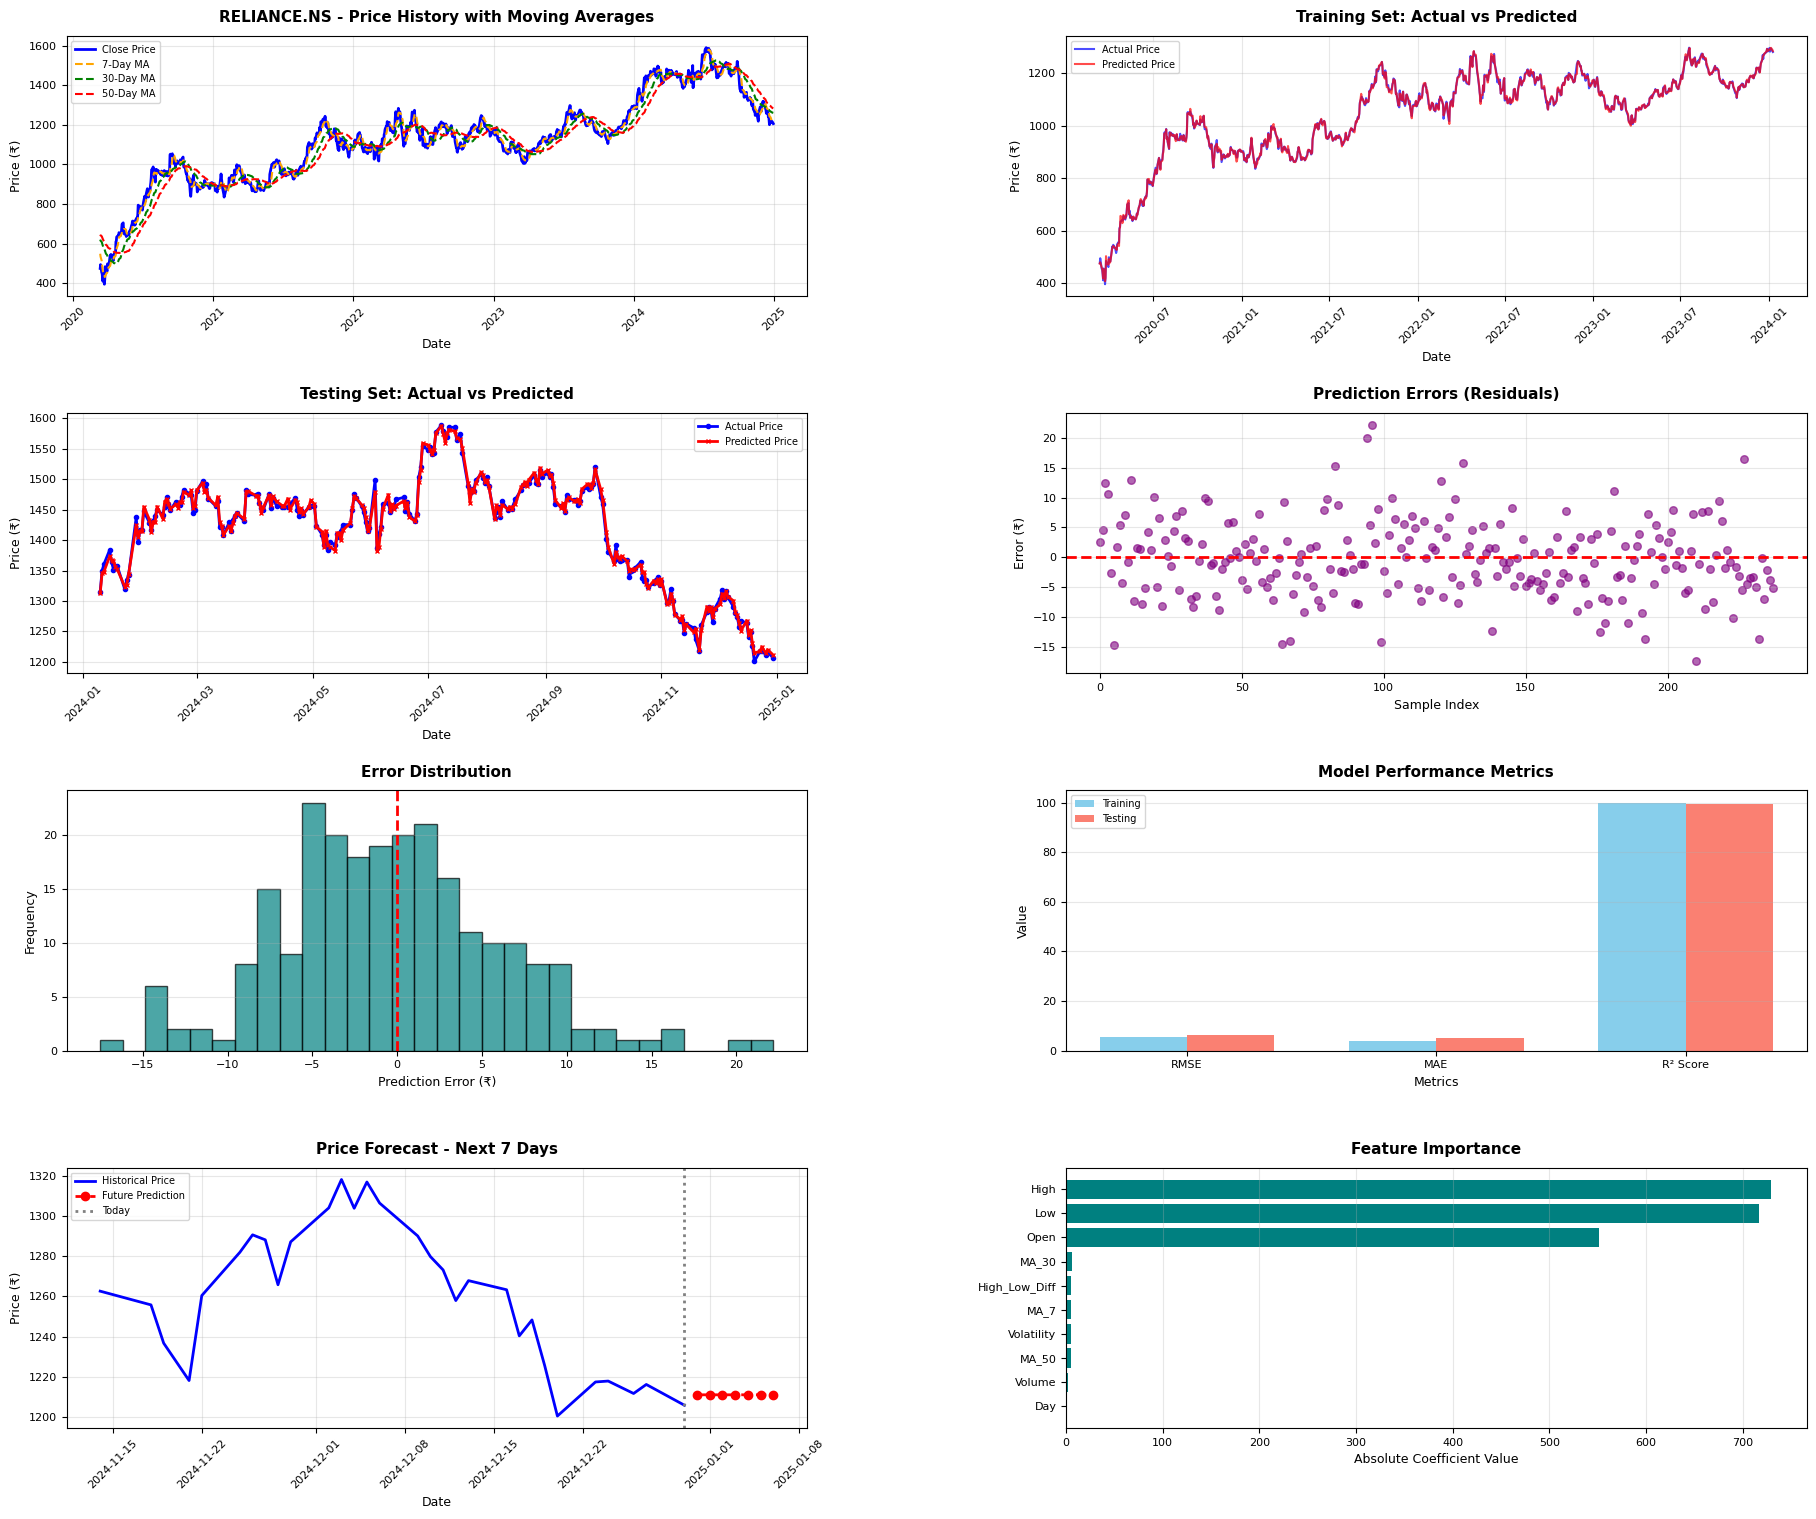



FINAL SUMMARY
Stock Analyzed: RELIANCE.NS
Data Source: Yahoo Finance API
Algorithm Used: Linear Regression
Total Data Points: 1188
Training Period: 950 days
Testing Period: 238 days

Model Performance:
  Accuracy: 99.45%
  RMSE: ₹6.41
  MAE: ₹5.03

Current Analysis:
  Current Price: ₹1205.88
  Market Signal: 🔴 BEARISH TREND (Sell Signal)

Future Forecast:
  7-Day Trend: 📈 UPWARD
  Expected Change: +0.43%
  Predicted Price Range: ₹1211.06 - ₹1211.06
✓ STOCK MARKET PREDICTION COMPLETED SUCCESSFULLY!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("STOCK MARKET PREDICTION - YAHOO FINANCE API")
print("=" * 70)

print("\n📊 POPULAR STOCK TICKERS:")
print("\nIndian Stocks (NSE):")
print("  - RELIANCE.NS (Reliance Industries)")
print("  - TCS.NS (Tata Consultancy Services)")
print("  - INFY.NS (Infosys)")
print("  - HDFCBANK.NS (HDFC Bank)")
print("  - SBIN.NS (State Bank of India)")
print("\nUS Stocks:")
print("  - AAPL (Apple)")
print("  - MSFT (Microsoft)")
print("  - GOOGL (Google)")
print("  - TSLA (Tesla)")
print("  - AMZN (Amazon)")
print("=" * 70)

ticker = input("\n📈 Enter Stock Ticker Symbol (default: RELIANCE.NS): ").upper().strip()
if not ticker:
    ticker = "RELIANCE.NS"

try:
    forecast_days = int(input("📅 Enter number of days to forecast (default: 7): ") or "7")
except:
    forecast_days = 7

print("\n" + "=" * 70)
print(f"🔍 ANALYZING: {ticker}")
print("=" * 70)

print("\nSTEP 1: FETCH REAL DATA FROM YAHOO FINANCE")
print("-" * 70)

ticker = "RELIANCE.NS"
start_date = "2020-01-01"
end_date = "2024-12-31"

print(f"Fetching data for: {ticker}")
print(f"Period: {start_date} to {end_date}")

stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

if stock_data.empty:
    print("Data not found! Using alternative ticker...")
    ticker = "AAPL"
    stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

stock_data.reset_index(inplace=True)

print(f"\n✓ Data fetched successfully for {ticker}!")
print("\nFirst 5 rows of data:")
print(stock_data.head())
print(f"\nTotal records: {len(stock_data)}")
print(f"Date range: {stock_data['Date'].min()} to {stock_data['Date'].max()}")


print("\n\nSTEP 2: DATA PREPROCESSING")
print("-" * 70)

stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values('Date')
stock_data['Day'] = range(len(stock_data))

print("✓ Data cleaned and sorted")
print("\nData Info:")
print(f"  Columns: {list(stock_data.columns)}")
print(f"  Shape: {stock_data.shape}")
print(f"  Missing values: {stock_data.isnull().sum().sum()}")


print("\n\nSTEP 3: FEATURE ENGINEERING")
print("-" * 70)

stock_data['MA_7'] = stock_data['Close'].rolling(window=7).mean()
stock_data['MA_30'] = stock_data['Close'].rolling(window=30).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Price_Change'] = stock_data['Close'].diff()
stock_data['Volatility'] = stock_data['Close'].rolling(window=7).std()
stock_data['High_Low_Diff'] = stock_data['High'] - stock_data['Low']
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

stock_data = stock_data.dropna()

print("✓ Technical Indicators Created:")
print("  - 7-Day Moving Average")
print("  - 30-Day Moving Average")
print("  - 50-Day Moving Average")
print("  - Volatility (7-day)")
print("  - High-Low Difference")
print("  - Daily Return")

print("\nSample data with indicators:")
print(stock_data[['Date', 'Close', 'MA_7', 'MA_30', 'Volatility']].head(10))
print(f"\nData shape after feature engineering: {stock_data.shape}")


print("\n\nSTEP 4: PREPARE TRAINING DATA")
print("-" * 70)

features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_30',
            'MA_50', 'Volatility', 'High_Low_Diff', 'Day']
X = stock_data[features]
y = stock_data['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Data Split Complete:")
print(f"  Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"  Total features: {len(features)}")
print(f"  Features: {features}")
print(f"\n✓ Data Normalized using MinMaxScaler")


print("\n\nSTEP 5: BUILD AND TRAIN MODEL")
print("-" * 70)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✓ Algorithm Used: Linear Regression")
print("✓ Model trained successfully!")
print(f"\nModel Parameters:")
print(f"  Intercept: {float(model.intercept_):.2f}")
print(f"  Number of coefficients: {len(model.coef_)}")
print(f"\nTop 3 Feature Coefficients:")
feature_coef = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_.flatten()
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_coef.head(3))


print("\n\nSTEP 6: MAKE PREDICTIONS")
print("-" * 70)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("✓ Predictions completed for training and testing sets")
print("\nSample predictions vs actual (Test Set):")
actual_values = y_test.values.flatten()[:10]
pred_values = y_test_pred.flatten()[:10]
comparison = pd.DataFrame({
    'Actual': actual_values,
    'Predicted': pred_values,
    'Difference': actual_values - pred_values,
    'Error %': ((actual_values - pred_values) / actual_values * 100)
})
print(comparison)


print("\n\nSTEP 7: EVALUATE MODEL PERFORMANCE")
print("-" * 70)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("TRAINING SET METRICS:")
print(f"  RMSE (Root Mean Squared Error): ₹{train_rmse:.2f}")
print(f"  MAE (Mean Absolute Error): ₹{train_mae:.2f}")
print(f"  R² Score: {train_r2:.4f} ({train_r2*100:.2f}%)")

print("\nTESTING SET METRICS:")
print(f"  RMSE (Root Mean Squared Error): ₹{test_rmse:.2f}")
print(f"  MAE (Mean Absolute Error): ₹{test_mae:.2f}")
print(f"  R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")

accuracy = test_r2 * 100
print(f"\n✓ Overall Model Accuracy: {accuracy:.2f}%")

if accuracy >= 90:
    performance = "🟢 EXCELLENT"
elif accuracy >= 75:
    performance = "🟡 GOOD"
elif accuracy >= 60:
    performance = "🟠 MODERATE"
else:
    performance = "🔴 NEEDS IMPROVEMENT"

print(f"✓ Model Performance Rating: {performance}")


print("\n\nSTEP 8: CURRENT STOCK ANALYSIS")
print("-" * 70)

current_price = float(stock_data['Close'].iloc[-1])
previous_price = float(stock_data['Close'].iloc[-2])
price_change = current_price - previous_price
price_change_pct = (price_change / previous_price) * 100

ma7_current = float(stock_data['MA_7'].iloc[-1])
ma30_current = float(stock_data['MA_30'].iloc[-1])
ma50_current = float(stock_data['MA_50'].iloc[-1])
volatility_current = float(stock_data['Volatility'].iloc[-1])

print(f"Stock: {ticker}")
print(f"Current Price: ₹{current_price:.2f}")
print(f"Previous Close: ₹{previous_price:.2f}")
print(f"Change: ₹{price_change:.2f} ({price_change_pct:+.2f}%)")

print(f"\nTechnical Indicators:")
print(f"  7-Day MA: ₹{ma7_current:.2f}")
print(f"  30-Day MA: ₹{ma30_current:.2f}")
print(f"  50-Day MA: ₹{ma50_current:.2f}")
print(f"  Volatility: ₹{volatility_current:.2f}")

if current_price > ma7_current > ma30_current:
    signal = "🟢 BULLISH TREND (Strong Buy Signal)"
elif current_price < ma7_current < ma30_current:
    signal = "🔴 BEARISH TREND (Sell Signal)"
else:
    signal = "🟡 NEUTRAL/SIDEWAYS (Hold)"

print(f"\nMarket Signal: {signal}")


print("\n\nSTEP 9: FUTURE PRICE PREDICTION")
print("-" * 70)

last_data = X_test.iloc[-1:].copy()
future_predictions = []

print(f"Predicting next {forecast_days} days for {ticker}:")
for i in range(forecast_days):
    last_scaled = scaler.transform(last_data)
    next_price = float(model.predict(last_scaled)[0])
    future_predictions.append(next_price)
    change_from_current = ((next_price - current_price) / current_price) * 100
    print(f"  Day {i+1}: ₹{next_price:.2f} ({change_from_current:+.2f}% from current)")
    last_data['Day'] = last_data['Day'] + 1

avg_future = np.mean(future_predictions)
trend = "📈 UPWARD" if future_predictions[-1] > current_price else "📉 DOWNWARD"
future_change = ((future_predictions[-1] - current_price) / current_price) * 100

print(f"\nForecast Summary:")
print(f"  Average Predicted Price: ₹{avg_future:.2f}")
print(f"  Expected Trend: {trend}")
print(f"  Expected Change (7 days): {future_change:+.2f}%")
print(f"  Price Range: ₹{min(future_predictions):.2f} - ₹{max(future_predictions):.2f}")


print("\n\nSTEP 10: VISUALIZATION")
print("-" * 70)

plt.figure(figsize=(20, 16))

plt.subplot(4, 2, 1)
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(stock_data['Date'], stock_data['MA_7'], label='7-Day MA', color='orange', linestyle='--')
plt.plot(stock_data['Date'], stock_data['MA_30'], label='30-Day MA', color='green', linestyle='--')
plt.plot(stock_data['Date'], stock_data['MA_50'], label='50-Day MA', color='red', linestyle='--')
plt.title(f'{ticker} - Price History with Moving Averages', fontsize=11, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Price (₹)', fontsize=9)
plt.legend(fontsize=7)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(4, 2, 2)
train_dates = stock_data.iloc[:len(X_train)]['Date'].values
train_actual = y_train.values.flatten()
train_pred = y_train_pred.flatten()
plt.plot(train_dates, train_actual, label='Actual Price', color='blue', linewidth=1.5, alpha=0.7)
plt.plot(train_dates, train_pred, label='Predicted Price', color='red', linewidth=1.5, alpha=0.7)
plt.title('Training Set: Actual vs Predicted', fontsize=11, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Price (₹)', fontsize=9)
plt.legend(fontsize=7)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(4, 2, 3)
test_dates = stock_data.iloc[len(X_train):]['Date'].values
actual_values = y_test.values.flatten()
pred_values = y_test_pred.flatten()
plt.plot(test_dates, actual_values, label='Actual Price', color='blue', marker='o', markersize=3, linewidth=2)
plt.plot(test_dates, pred_values, label='Predicted Price', color='red', marker='x', markersize=3, linewidth=2)
plt.title('Testing Set: Actual vs Predicted', fontsize=11, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Price (₹)', fontsize=9)
plt.legend(fontsize=7)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(4, 2, 4)
errors = actual_values - pred_values
plt.scatter(range(len(errors)), errors, alpha=0.6, color='purple', s=30)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Prediction Errors (Residuals)', fontsize=11, fontweight='bold', pad=10)
plt.xlabel('Sample Index', fontsize=9)
plt.ylabel('Error (₹)', fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(4, 2, 5)
plt.hist(errors, bins=30, color='teal', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.title('Error Distribution', fontsize=11, fontweight='bold', pad=10)
plt.xlabel('Prediction Error (₹)', fontsize=9)
plt.ylabel('Frequency', fontsize=9)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(4, 2, 6)
metrics = ['RMSE', 'MAE', 'R² Score']
train_scores = [train_rmse, train_mae, train_r2*100]
test_scores = [test_rmse, test_mae, test_r2*100]
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, train_scores, width, label='Training', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Testing', color='salmon')
plt.xlabel('Metrics', fontsize=9)
plt.ylabel('Value', fontsize=9)
plt.title('Model Performance Metrics', fontsize=11, fontweight='bold', pad=10)
plt.xticks(x, metrics, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=7)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(4, 2, 7)
future_dates = pd.date_range(start=stock_data['Date'].iloc[-1], periods=forecast_days+1, freq='D')[1:]
plt.plot(stock_data['Date'].iloc[-30:], stock_data['Close'].iloc[-30:],
         label='Historical Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='Future Prediction',
         color='red', marker='o', markersize=6, linewidth=2, linestyle='--')
plt.axvline(x=stock_data['Date'].iloc[-1], color='gray', linestyle=':', linewidth=2, label='Today')
plt.title(f'Price Forecast - Next {forecast_days} Days', fontsize=11, fontweight='bold', pad=10)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Price (₹)', fontsize=9)
plt.legend(fontsize=7)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

plt.subplot(4, 2, 8)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(model.coef_.flatten())
}).sort_values('Importance', ascending=True)
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.title('Feature Importance', fontsize=11, fontweight='bold', pad=10)
plt.xlabel('Absolute Coefficient Value', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, alpha=0.3, axis='x')

plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08, hspace=0.45, wspace=0.35)
filename = f'{ticker}_complete_analysis.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"✓ Complete analysis chart saved as '{filename}'")
plt.show()


print("\n\n" + "=" * 70)
print("FINAL SUMMARY")
print("=" * 70)
print(f"Stock Analyzed: {ticker}")
print(f"Data Source: Yahoo Finance API")
print(f"Algorithm Used: Linear Regression")
print(f"Total Data Points: {len(stock_data)}")
print(f"Training Period: {len(X_train)} days")
print(f"Testing Period: {len(X_test)} days")
print(f"\nModel Performance:")
print(f"  Accuracy: {accuracy:.2f}%")
print(f"  RMSE: ₹{test_rmse:.2f}")
print(f"  MAE: ₹{test_mae:.2f}")
print(f"\nCurrent Analysis:")
print(f"  Current Price: ₹{current_price:.2f}")
print(f"  Market Signal: {signal}")
print(f"\nFuture Forecast:")
print(f"  7-Day Trend: {trend}")
print(f"  Expected Change: {future_change:+.2f}%")
print(f"  Predicted Price Range: ₹{min(future_predictions):.2f} - ₹{max(future_predictions):.2f}")
print("=" * 70)
print("✓ STOCK MARKET PREDICTION COMPLETED SUCCESSFULLY!")
print("=" * 70)